In [1]:
# Fist install the library

#%pip install aepy

In [2]:
import os
import sys

notebook_dir = os.path.abspath('')
sys.path.append(os.path.join(notebook_dir, '..'))

import numpy as np

from sklearn.metrics import accuracy_score
from keras import utils

from aepy.data.datasets import load_MNIST
from aepy.data.utils import evaluate, display_diff, add_noise
from aepy.models.vq_vae.vq_vae_model import VQ_VAE
from aepy.models.base.default_architectures import Encoder_Conv_VQ_MNIST, Decoder_Conv_VQ_MNIST
from aepy.pipelines.training import TrainingPipeline

Using TensorFlow backend


2023-12-07 22:44:02.426847: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 22:44:02.426897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 22:44:02.448071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 22:44:02.497294: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 22:44:03.278064: W tensorflow/compiler/tf2

In [3]:
# Load MNIST dataset
x_train, y_train, x_test, y_test = load_MNIST(persistant=True)

# Obtaint number of clasess
n_classes = len(set(y_train))

# Convert labels to categorical
y_train = utils.to_categorical(y_train, n_classes)
y_test = utils.to_categorical(y_test, n_classes)

2023-12-07 22:44:04 [INFO]: train-images-idx3-ubyte.gz already exists.
2023-12-07 22:44:04 [INFO]: train-labels-idx1-ubyte.gz already exists.
2023-12-07 22:44:04 [INFO]: t10k-images-idx3-ubyte.gz already exists.
2023-12-07 22:44:04 [INFO]: t10k-labels-idx1-ubyte.gz already exists.


In [4]:
train_data = dict(data=x_train.astype(float), labels=x_train)
test_data = dict(data=x_test.astype(float), labels=y_test)

In [6]:
# Model creation
model = VQ_VAE(input_dim=(x_train.shape[1], x_train.shape[2]), 
            latent_dim=2, encoder=Encoder_Conv_VQ_MNIST, decoder=Decoder_Conv_VQ_MNIST, layers_conf=[32, 64])

model.jit_compile = False

128
2
(28, 28)


2023-12-07 22:44:04.937883: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-07 22:44:05.024587: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-07 22:44:05.024760: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [7]:
pipe = TrainingPipeline(name='training_pipeline',
                        model=model, num_epochs=10)

trained_model = pipe(train_data=train_data)

2023-12-07 22:44:05 [INFO]: +++ training_pipeline +++
2023-12-07 22:44:05 [INFO]: Creating folder in ../output_dir/training_pipeline_2023-12-07_22-44-05


Epoch 1/10


/home/lucaspc/venvs/keras_core/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py:371: UserWarning: `build()` was called on layer 'encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  return py_builtins.overload_of(f)(*args)


(128, 7, 7, 2)
(128, 7, 7, 2)
(128, 7, 7, 2)


2023-12-07 22:44:15.695886: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


(96, 7, 7, 2)

Epoch 1: total_loss improved from inf to 1501.91687, saving model to ../output_dir/training_pipeline_2023-12-07_22-44-05/model.weights.h5
469/469 - 17s - 36ms/step - reconstruction_loss: 986.0414 - total_loss: 1501.9169 - vq_loss: 515.8762
Epoch 2/10

Epoch 2: total_loss improved from 1501.91687 to 608.01959, saving model to ../output_dir/training_pipeline_2023-12-07_22-44-05/model.weights.h5
469/469 - 2s - 5ms/step - reconstruction_loss: 435.1331 - total_loss: 608.0196 - vq_loss: 172.8863
Epoch 3/10

Epoch 3: total_loss improved from 608.01959 to 502.05264, saving model to ../output_dir/training_pipeline_2023-12-07_22-44-05/model.weights.h5
469/469 - 2s - 5ms/step - reconstruction_loss: 383.3222 - total_loss: 502.0526 - vq_loss: 118.7301
Epoch 4/10

Epoch 4: total_loss improved from 502.05264 to 450.95755, saving model to ../output_dir/training_pipeline_2023-12-07_22-44-05/model.weights.h5
469/469 - 3s - 5ms/step - reconstruction_loss: 356.7947 - total_loss: 450.9576 - 

In [8]:
import matplotlib.pyplot as plt

def show_subplot(original, reconstructed):
    plt.subplot(1, 2, 1)
    plt.imshow(original.squeeze() + 0.5)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed.squeeze() + 0.5)
    plt.title("Reconstructed")
    plt.axis("off")

    plt.show()

(9, 7, 7, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[[[ 0.14976053]
   [-0.01216669]
   [-0.6969697 ]
   ...
   [ 0.8905464 ]
   [-0.45159167]
   [-1.8876092 ]]

  [[ 0.1708601 ]
   [-0.0540802 ]
   [ 0.07301502]
   ...
   [-0.26675814]
   [ 0.70715696]
   [-1.7228501 ]]

  [[-0.48372763]
   [ 0.41660672]
   [ 0.5616587 ]
   ...
   [-0.770659  ]
   [ 1.4872367 ]
   [-0.38278407]]

  ...

  [[-0.4399807 ]
   [-0.322962  ]
   [ 0.4527815 ]
   ...
   [-0.4559967 ]
   [ 1.1262863 ]
   [ 1.2830017 ]]

  [[-1.0293734 ]
   [-0.44137734]
   [-0.15023346]
   ...
   [ 1.032337  ]
   [ 0.22198658]
   [ 0.44013005]]

  [[ 1.1018932 ]
   [ 1.2733066 ]
   [ 1.0060108 ]
   ...
   [-0.13072224]
   [-0.8649313 ]
   [ 2.718016  ]]]


 [[[ 0.14976053]
   [-0.01216669]
   [-0.6969697 ]
   ...
   [-0.279776  ]
   [-0.20407744]
   [-0.2897851 ]]

  [[ 0.1708601 ]
   [-0.0540802 ]
   [ 0.07301502]
   ...
   [ 0.5928858 ]
   [ 0.5604432 ]
   [-1.9477143 ]]

  [[-0.4837286 ]
   [ 0.41660672]
   [ 0.5616587 ]
 

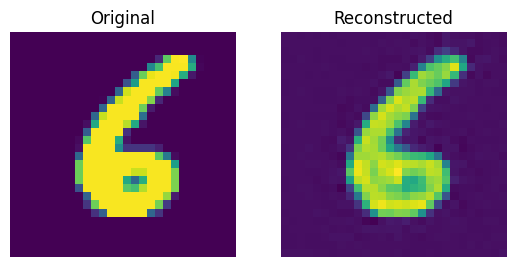

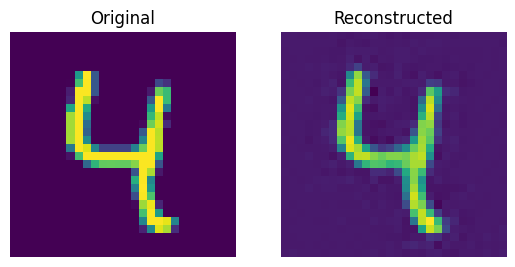

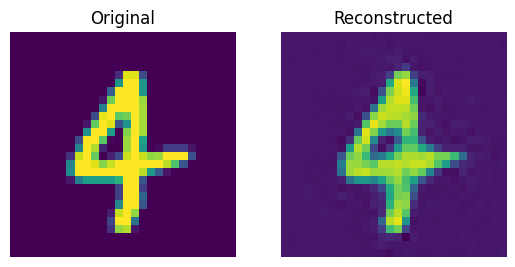

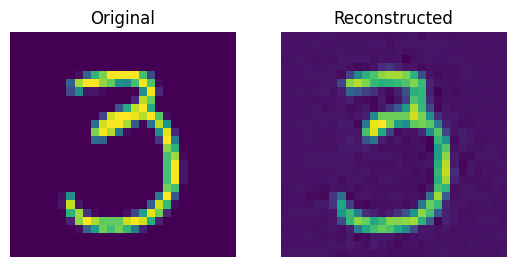

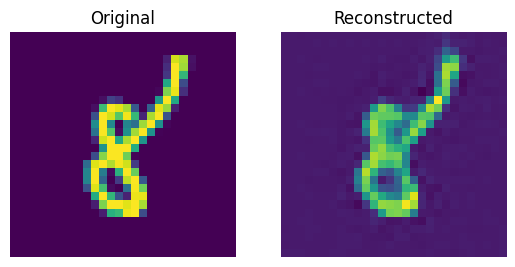

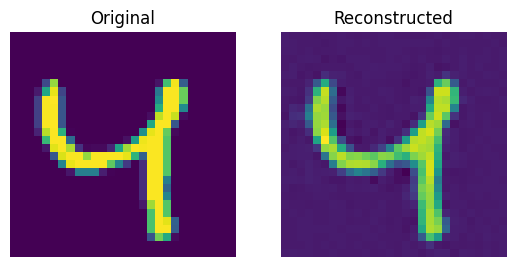

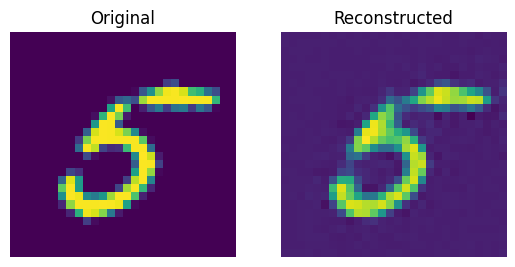

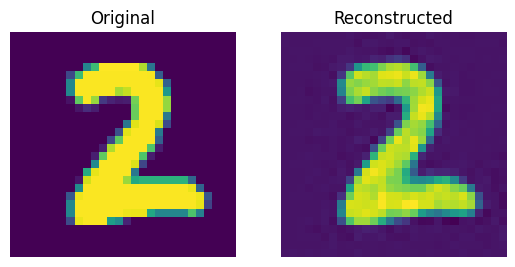

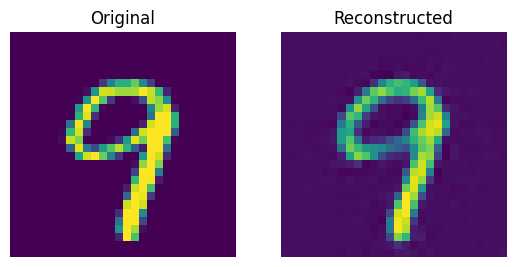

In [26]:
idx = np.random.choice(len(x_test), 9)

test_images = x_test[idx]
test_labels = y_test[idx]

#print(test_images.shape)
#print(test_labels.shape)

test_data = dict(data=test_images.astype(float), labels=test_labels)

reconstructions_test = trained_model.predict(test_data)

print(reconstructions_test['recon'])

for test_image, reconstructed_image in zip(test_images, reconstructions_test['recon']):
    show_subplot(test_image, reconstructed_image)